# Task 1


In [1]:
from scipy.sparse import csc_matrix, coo_matrix
from scipy.sparse.linalg import lsqr
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def construct_X(M, alphas, Np = None):
    # choose a appropriate Value for Np
    if Np == None:
        Np_min = int(np.ceil(np.sqrt(2) * M))
        if Np_min % 2 == 0:
            Np = Np_min + 1
        else:
            Np = Np_min + 2
    # we define a0 and b0 as the center of the image eg. 0
    if M % 2 == 0:
        extent = M/2
        j_a, j_b = np.mgrid[-extent : extent+1, -extent : extent+1]
    else:
        extent = (M-1)/2
        j_a, j_b = np.mgrid[-extent : extent+1, -extent : extent+1]
    C = np.row_stack([j_a.flatten(), j_b.flatten()])
    alphas = np.deg2rad(alphas)
    n = np.row_stack([-np.sin(alphas), np.cos(alphas)])

    p = (n.T @ C) + ((Np-1)/2)
    p_split_f, p_split_i = np.modf(p)
    w0 = 1 - p_split_f
    w1 = p_split_f
    i_0 = p_split_i
    i_1 = p_split_i+1

    for i in range(len(alphas)):
        i_0[i,:] += Np * i
        i_1[i,:] += Np * i
    i_indices = np.concatenate([i_0, i_1]).flatten()
    j_indices = np.tile(np.arange(C.shape[1]), 2*len(alphas)).flatten()
    weights = np.concatenate([w0,w1]).flatten()

    X = coo_matrix((weights, (i_indices,j_indices)), shape=(Np * len(alphas), C.shape[1]), dtype = np.float32)
    return X


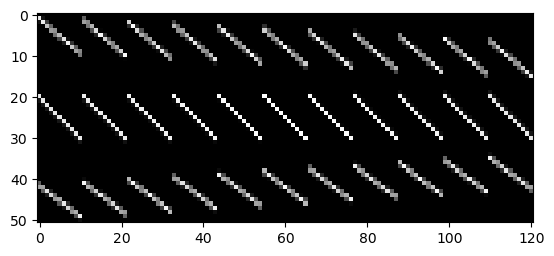

In [3]:
test_vis = construct_X(10, [-33, 1, 42])
plt.imshow(test_vis.toarray(),cmap='grey', interpolation='nearest')

# Task 2

In [4]:
def coo_to_csc(coo):
    if isinstance(coo, csc_matrix):
        return coo
    else:
        return coo.tocsc()

In [5]:
def show_tomogram(X, y):
    beta = lsqr(X, y,atol=1e-06,btol=1e-06)[0]
    
    mu = np.ndarray((M, M))
    for ja in range(M):
        for jb in range(M):
            mu[ja, jb] = beta[ja + M * jb]
            
    plt.imshow(mu, cmap="gray", interpolation="nearest")
    plt.show()
    


In [6]:
def print_sparsity(X):
    print(f"Number of non-zero entries: {X.nnz}")
    print(f"Sparsity: {(X.shape[0] * X.shape[1] - X.nnz) / (X.shape[0] * X.shape[1])}")
    



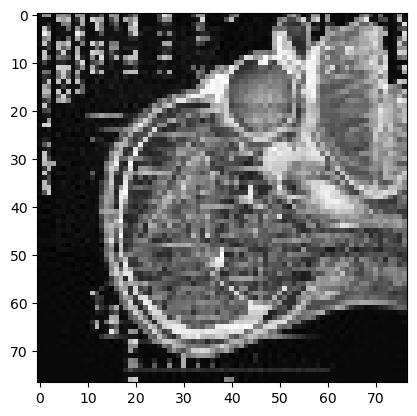

Number of non-zero entries: 1066978
Sparsity: 0.98165553683247


In [12]:
# option small
alphas = np.load(r"C:\Users\ROSHAL CARDOZA\Desktop\WS24\MLE\hs_tomography\hs_tomography\alphas_77.npy")
y = np.load(r"C:\Users\ROSHAL CARDOZA\Desktop\WS24\MLE\hs_tomography\hs_tomography\y_77.npy")
#X = coo_to_csc(construct_X(77, alphas, 109))
X = csc_matrix(np.load(r"C:\Users\ROSHAL CARDOZA\Desktop\WS24\MLE\hs_tomography\hs_tomography\X_77.npy", allow_pickle=True).all())
M = 77
show_tomogram(X,y)
print_sparsity(X)

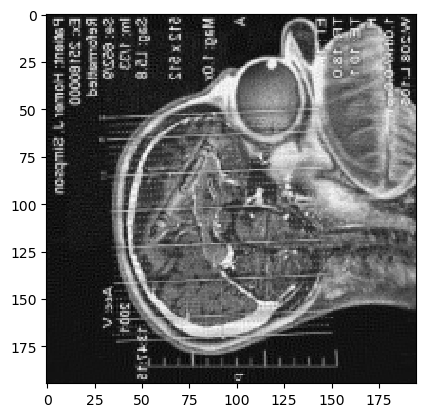

Number of non-zero entries: 13612950
Sparsity: 0.9927272727272727


In [13]:
# option big 
alphas = np.load(r"C:\Users\ROSHAL CARDOZA\Desktop\WS24\MLE\hs_tomography\hs_tomography\alphas_195.npy")
y = np.load(r"c:\Users\ROSHAL CARDOZA\Desktop\WS24\MLE\hs_tomography\hs_tomography\y_195.npy")
X = coo_to_csc(construct_X(195, alphas, 275))
M = 195    
show_tomogram(X, y)
print_sparsity(X)


It looks like H.S. has a foreign object inside his skull.

# Task 3

In [14]:
# option small
M = 77
Np = 109
n_alphas = 90

In [15]:
# option big
M = 195
Np = 275
n_alphas = 179

Tomogram for 179 angles:


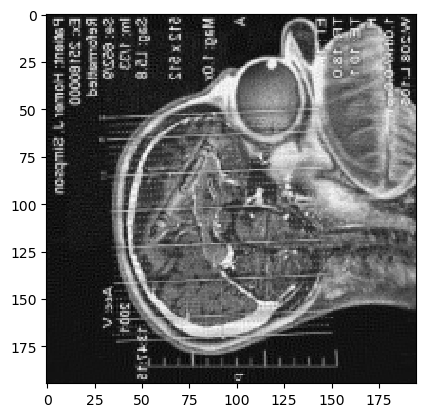

Tomogram for 170 angles:


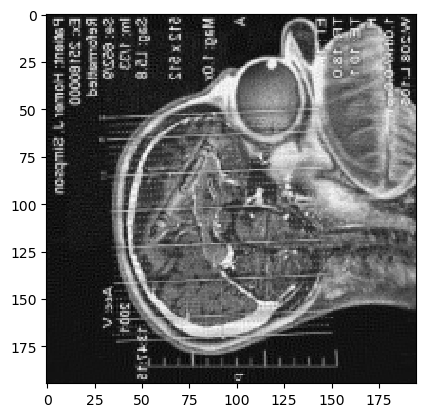

Tomogram for 161 angles:


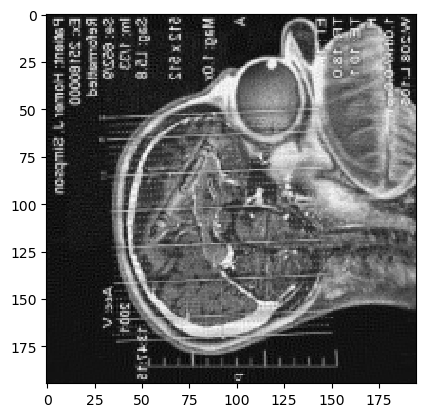

Tomogram for 152 angles:


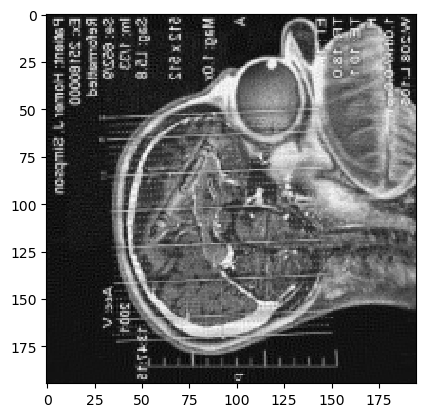

Tomogram for 143 angles:


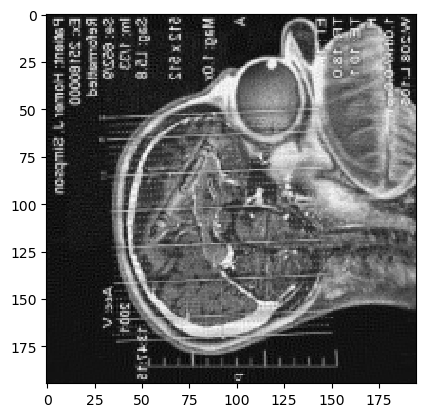

Tomogram for 134 angles:


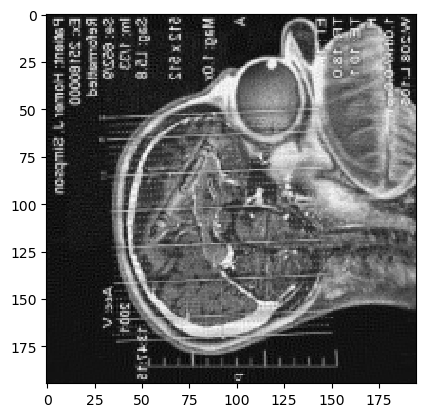

Tomogram for 125 angles:


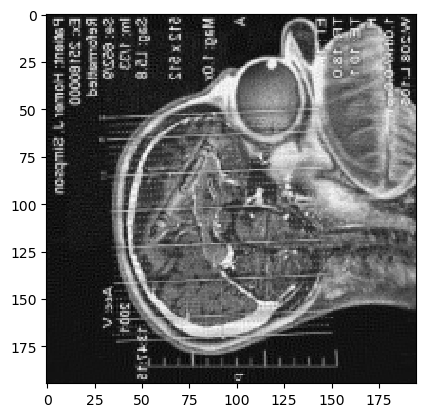

Tomogram for 116 angles:


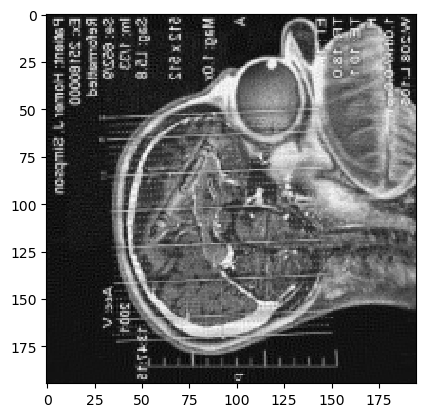

Tomogram for 107 angles:


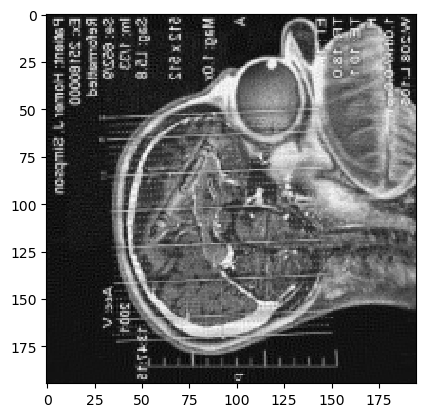

Tomogram for 98 angles:


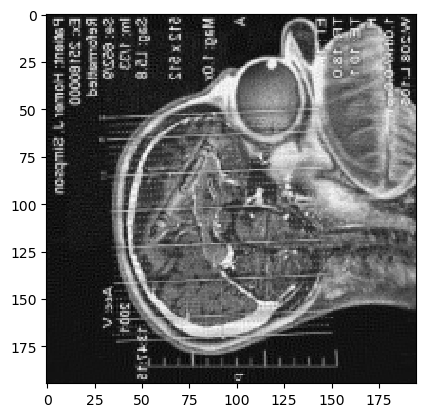

Tomogram for 89 angles:


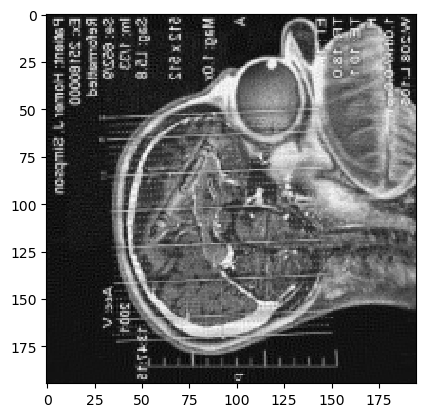

Tomogram for 80 angles:


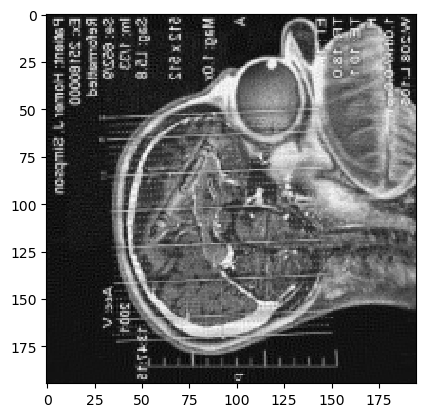

Tomogram for 71 angles:


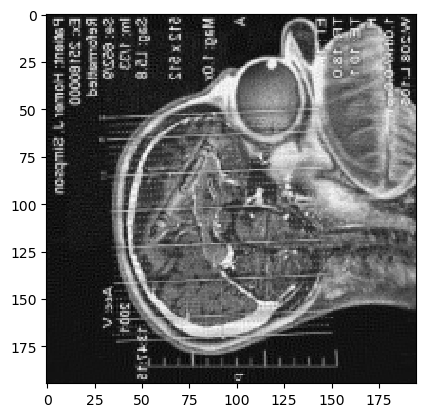

Tomogram for 62 angles:


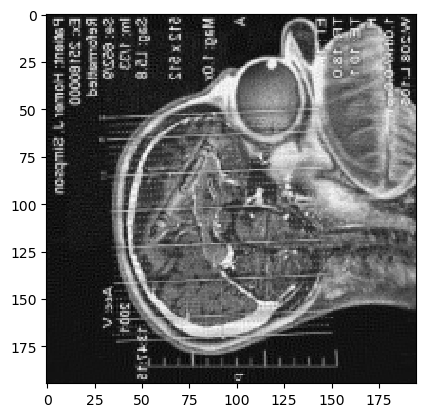

Tomogram for 53 angles:


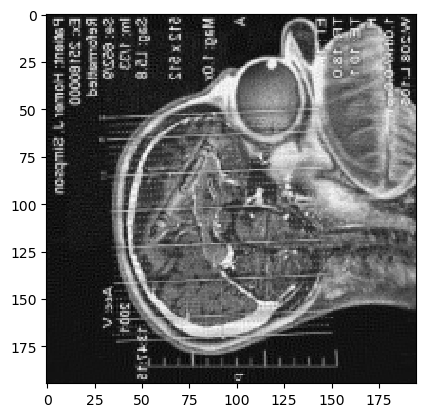

Tomogram for 44 angles:


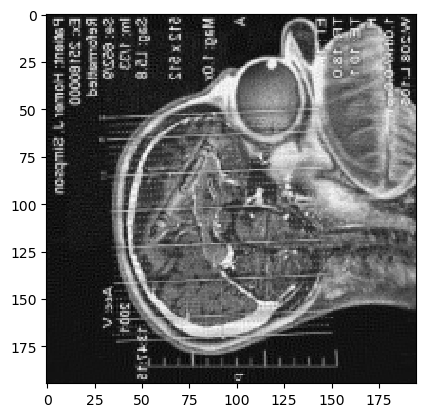

Tomogram for 35 angles:


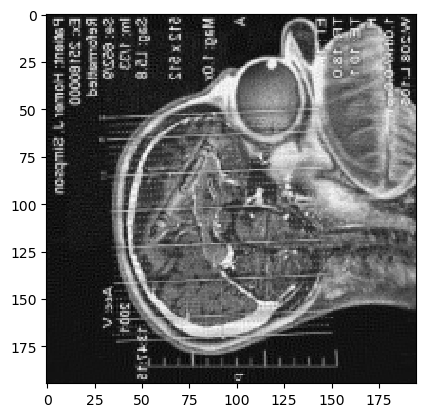

Tomogram for 26 angles:


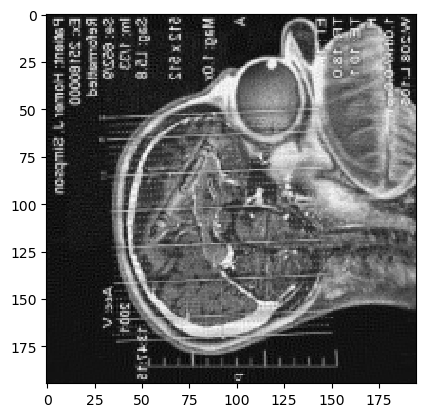

Tomogram for 17 angles:


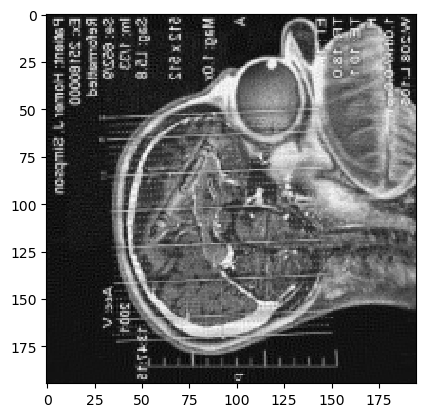

Tomogram for 8 angles:


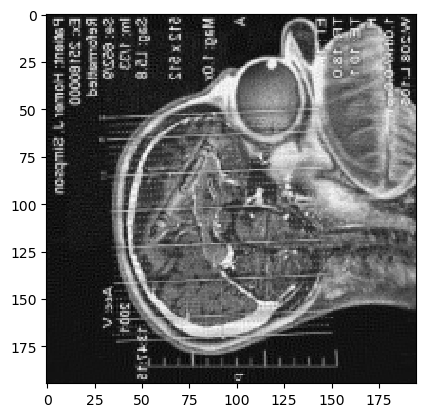

In [16]:
for n_alphas_ in range(n_alphas, 1, -1 * math.ceil(n_alphas / 20)):
    indices = np.linspace(0, len(alphas) - 1, n_alphas_, dtype=int)
    alphas_ = alphas[indices]
    y_ = y[indices]
    x_ = coo_to_csc(construct_X(M, alphas_, Np))
    print(f"Tomogram for {n_alphas_} angles:")
    show_tomogram(X, y)